In [1]:
"""
Author: Qiaochu Zhang
"""
%pylab inline
import pandas as pd
from pandas import Series, DataFrame
import os
import gc
import glob
import re
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from __future__ import division #c++ style division, no rounding
from scipy import stats
import copy
mpl.rcParams['axes.unicode_minus'] = False 
mpl.rcParams['axes.grid'] = True
plt.rc('figure', figsize=(13, 7))
plt.style.use('ggplot')
pd.set_option("display.max_columns",999)
pd.set_option("display.max_columns",999)
def ht(df, n = 5):
    print df.shape
    if len(df) <= 2*n:
        display(df)
    else:
        display(df.head(n).append(df.tail(n)))
def print_full(df):
    pd.set_option('display.max_rows', len(df))
    display(df)
    pd.reset_option('display.max_rows')
def FloatFormatOn():
    pd.options.display.float_format = '{:,.3f}'.format
def FloatFormatOff():
    pd.options.display.float_format = '{:f}'.format    
def PlotDistribution(data, output_location=None):
    plt.subplot(2, 2, 1)
    sns.boxplot(data, orient='v')
    plt.subplot(2, 2, 2)
    sns.distplot(data, bins=100)
    ax = plt.subplot(2, 1, 2)
    stats.probplot(data, dist=stats.norm, plot=ax)
    if output_location is not None: plt.savefig(output_location, bbox_inches='tight', pad_inches=0.1)
    plt.show()    
import sys
print(sys.version)
print(pd.__version__)
print(np.__version__)

Populating the interactive namespace from numpy and matplotlib
2.7.13 |Anaconda custom (64-bit)| (default, May 11 2017, 13:17:26) [MSC v.1500 64 bit (AMD64)]
0.20.3
1.12.1


In [2]:
import xgboost as xgb

from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston

In [3]:
rng = np.random.RandomState(31337)

In [4]:
print("Boston Housing: regression")
boston = load_boston()

Boston Housing: regression


In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
dfData=pd.DataFrame(data=boston['data'], columns=boston.feature_names)
dfTarget=pd.Series(data=boston['target'])

In [7]:
ht(dfData)

(506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [8]:
ht(dfTarget)

(506L,)


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
dtype: float64

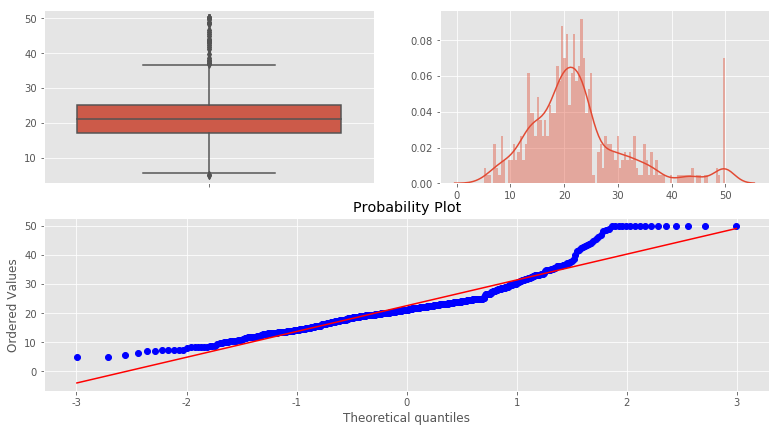

In [9]:
PlotDistribution(dfTarget)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(dfData, dfTarget, test_size = 0.2, random_state = rng)

In [11]:
print X_train.shape
print y_train.shape
print X_test.shape
print y_test.shape

(404, 13)
(404L,)
(102, 13)
(102L,)


In [12]:
model=xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

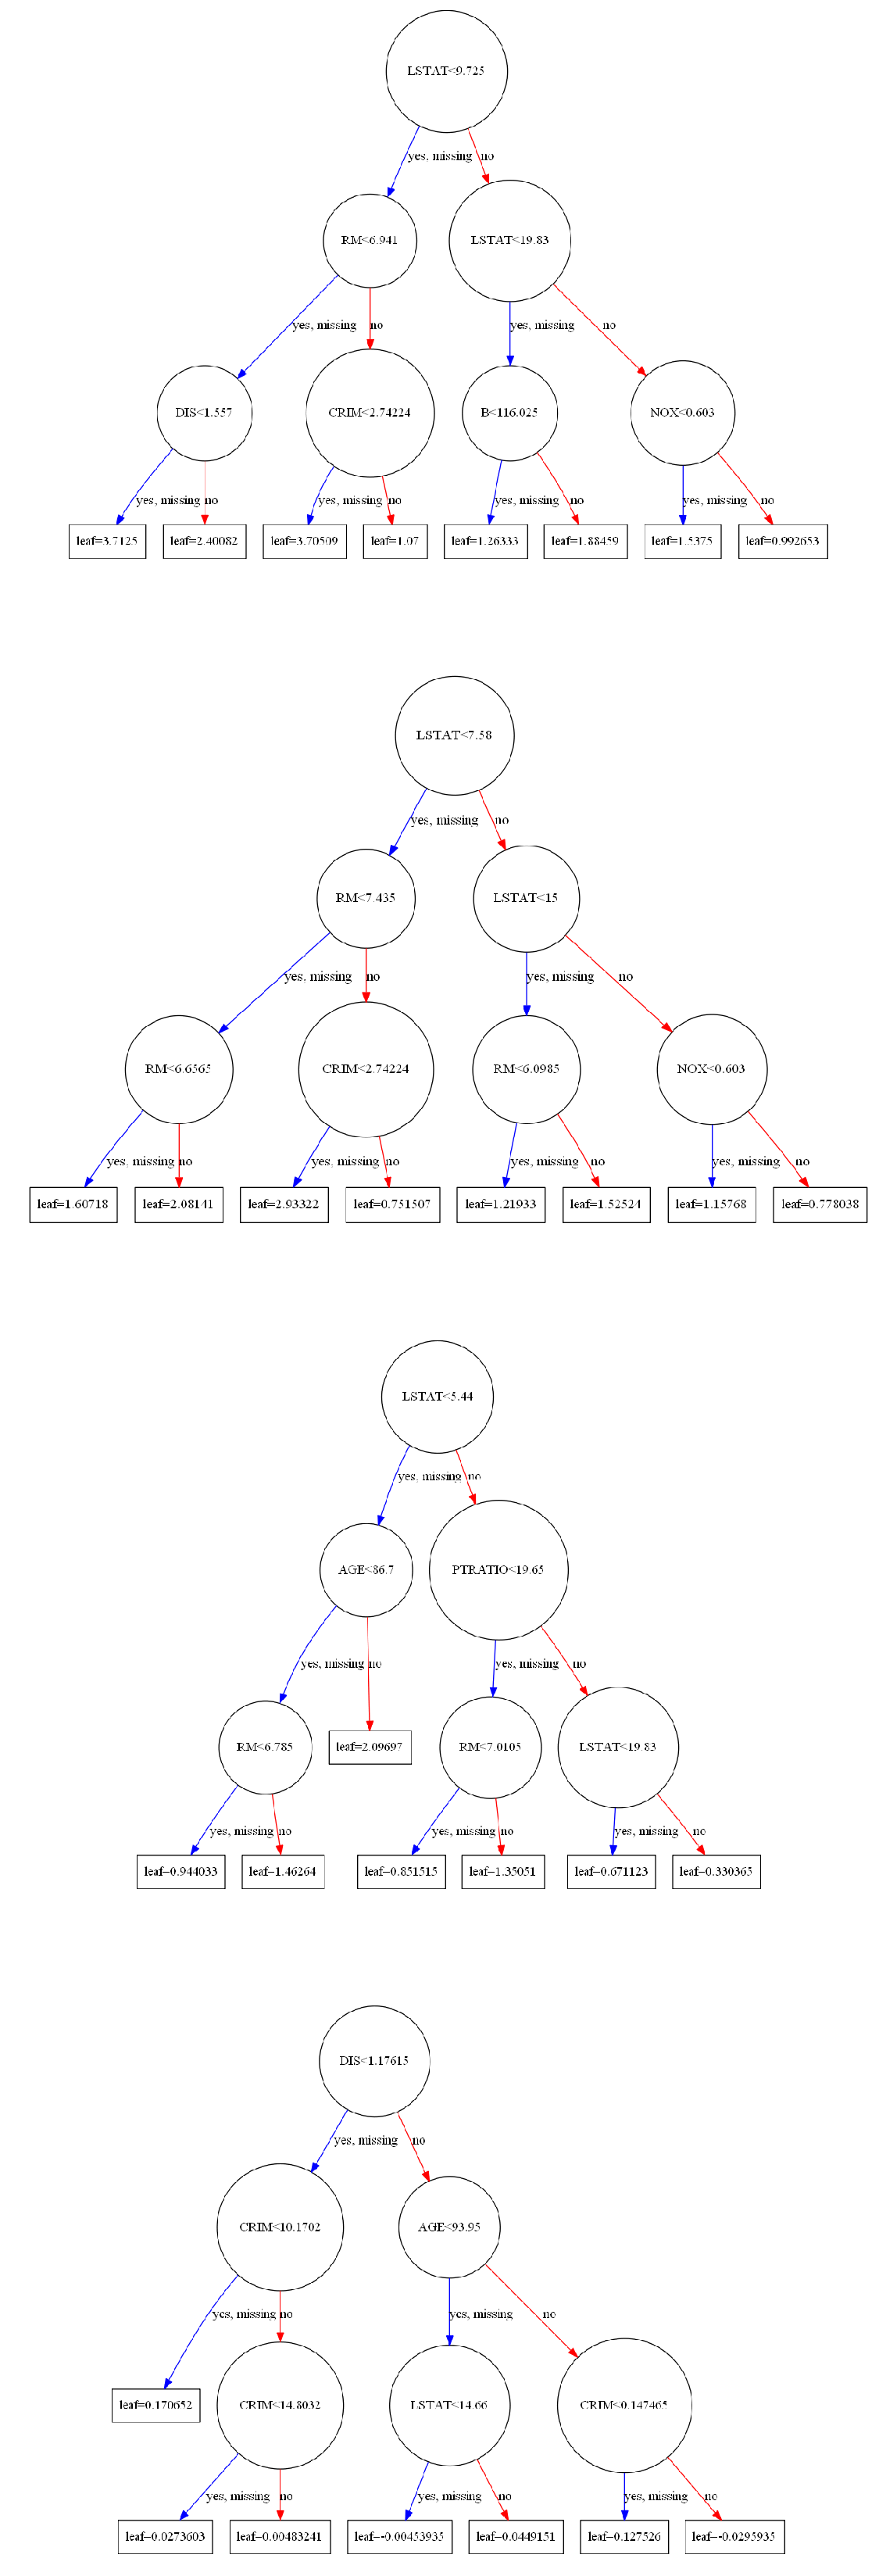

In [13]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,60)) 
xgb.plot_tree(model, num_trees=0, ax=axes[0])
xgb.plot_tree(model, num_trees=4, ax=axes[1])
xgb.plot_tree(model, num_trees=9, ax=axes[2])
xgb.plot_tree(model, num_trees=99, ax=axes[3])
plt.show()

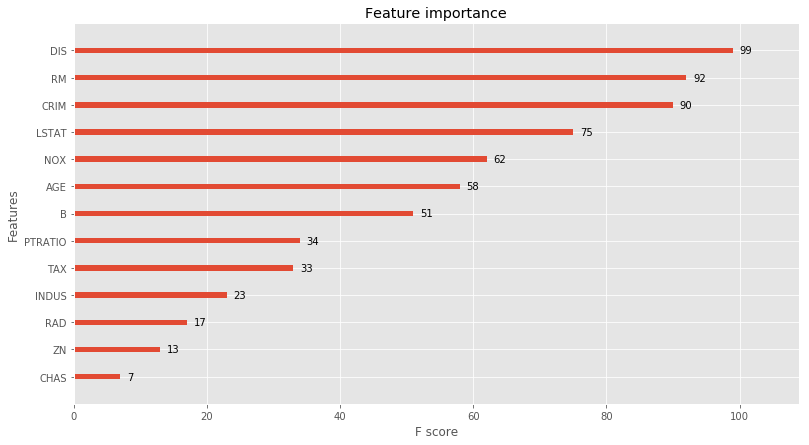

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=1) 
xgb.plot_importance(model, ax=ax)
plt.show()

In [46]:
def plot_partial_dependency(model, X, y, col):

    X_temp = X.copy()

    x_scan = np.linspace(np.percentile(X_temp[col], 0.1), np.percentile(X_temp[col], 99.5), 50)
    y_partial = []

    for point in x_scan:

        X_temp[col] = point

        y_partial.append(np.average(model.predict(X_temp)))

    y_partial = np.array(y_partial)

    # Plot partial dependence

    fig, ax = plt.subplots(figsize=(13,13))
    plt.subplots_adjust(left = 0.17, right = 0.94, bottom = 0.15, top = 0.9)

    ax.plot(x_scan, y_partial, '-', color = 'black', linewidth = 1)
    ax.plot(X[col], y, 'o', color = 'blue', alpha = 0.1)

    ax.set_xlim(min(x_scan), max(x_scan))
    ax.set_xlabel('Feature %s'%col, fontsize = 10)    
    ax.set_ylabel('Partial Dependence', fontsize = 12)

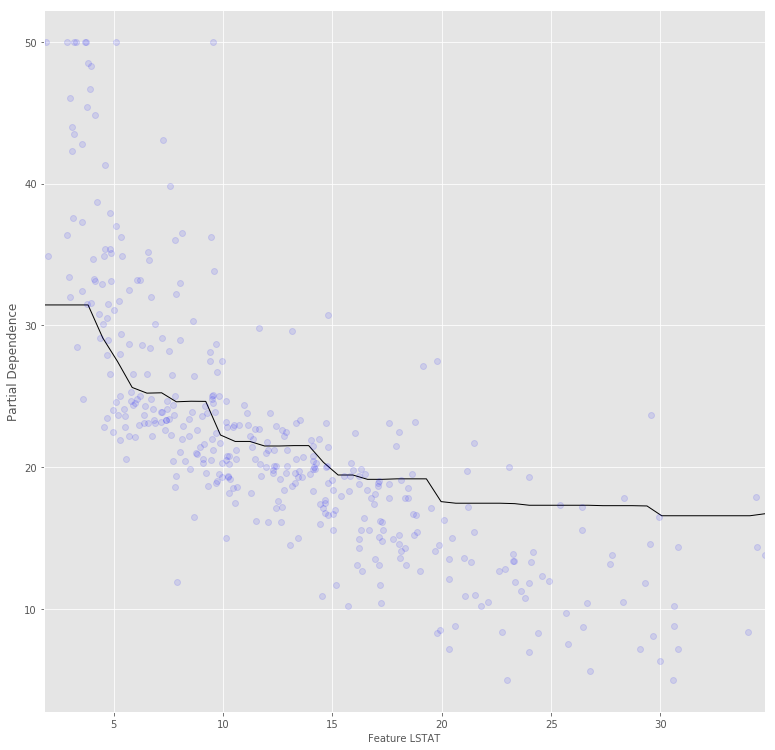

In [51]:
plot_partial_dependency(model, X_train, y_train, 'LSTAT')

In [4]:
kf = KFold(n_splits=2, shuffle=True, random_state=rng)
for train_index, test_index in kf.split(X):
    xgb_model = xgb.XGBRegressor().fit(X[train_index], y[train_index])
    predictions = xgb_model.predict(X[test_index])
    actuals = y[test_index]
    print(mean_squared_error(actuals, predictions))

22.2471951119
9.91466330358


In [5]:
print("Parameter optimization")
y = boston['target']
X = boston['data']
xgb_model = xgb.XGBRegressor()
clf = GridSearchCV(xgb_model,
                   {'max_depth': [2,4,6],
                    'n_estimators': [50,100,200]}, verbose=1)
clf.fit(X,y)

Parameter optimization
Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 200], 'max_depth': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [6]:
print(clf.best_score_)
print(clf.best_params_)

0.598487960649
{'n_estimators': 100, 'max_depth': 4}
